In [3]:
import pandas as pd
from decimal import *
from dotenv import load_dotenv, find_dotenv
from arbitrage_tools import *

getcontext().prec = 6
load_dotenv('.env')

kraken_asks = prepare_order_book(kraken_order_book('asks'), 'asks')
bitx_bids = prepare_order_book(bitx_order_book('bids'), 'bids')

transfer_amount = Decimal(50000)
fixed_currency_exchange = Decimal(16.711)

new = True

if new:
    simulate(transfer_amount,  kraken_asks, bitx_bids, transfer_fees=True)
else:
    simulate(transfer_amount,  kraken_asks, bitx_bids, exchange_rate=fixed_currency_exchange, transfer_fees=False)


Rands: 50365.00
# forex conversion: 365.00
Euro: 3008.52
# kraken fee: 377.41
Bitcoins: 4.95836000
# bitx fee: 529.35
Rands: 51564.40
--------------------
Profit: 1190.90
ROI: 2.36
--------------------
ZAR/EUR: 16.54
EUR/BTC: 605.18
BTC/ZAR: 10504.50


In [4]:
original_zar = 50000
original_euros = 2977.04 

original_pre_fees = 365
original_post_fee = 5
original_currency_rate = 16.711

euro = 1182.38

currency_rate = original_currency_rate

currency_pre_fees = original_pre_fees * (euro * currency_rate)/original_zar
currency_post_fees = original_post_fee * euro/original_euros

begin = (euro + currency_post_fees) * currency_rate + currency_pre_fees
eind = 20531.64

(eind/begin - 1) * 100

(eind - begin)/begin * 100

2.986850079926228

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import seaborn as sns

In [16]:
r = []
for i in range(100):
    r.append(
        [  
            (i+1)*1000,
            simulate((i+1)*1000,  
                     kraken_asks, bitx_bids, 
                     exchange_rate=fixed_currency_exchange, 
                     transfer_fees=False, verbose=False)['roi'],
        ])

df = pd.DataFrame(r, columns=['ZAR', 'ROI'])
df = df.astype(float).set_index('ZAR')

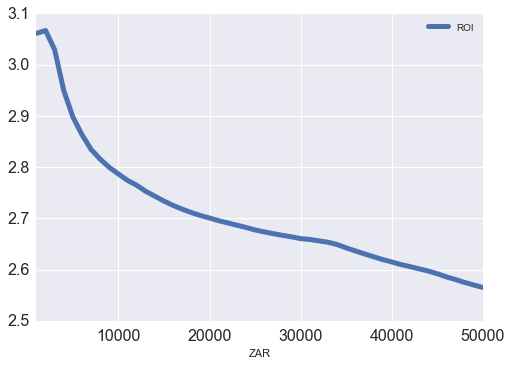

In [20]:
df[df.ROI > 1][:50000].plot(lw=5, fontsize=16)

In [21]:
df.max()

ROI    3.0675
dtype: float64

In [ ]:
# OUL4M4	buy/market	XBT/EUR	€609.822	0.20000000	€121.964	Closed	07-02-16 09:50:21 +0200
# AGB2OLW	07-02-16 10:00:58 +0200	Bitcoin	฿0.19950	฿0.00050	
# Sell 0.011687 @ 10,631	BTC/ZAR	0.011687	124.24	BTC 0.000116	7/2/2016, 11:23
# Sell 0.197524 @ 10,650	BTC/ZAR	0.185838	1,979.17	BTC 0.001858	7/2/2016, 11:20